In [7]:
import numpy as np
from scipy.interpolate import BarycentricInterpolator
def chebyshev_points(n):
    return np.cos((2*np.arange(n) + 1) * np.pi / (2 * n))

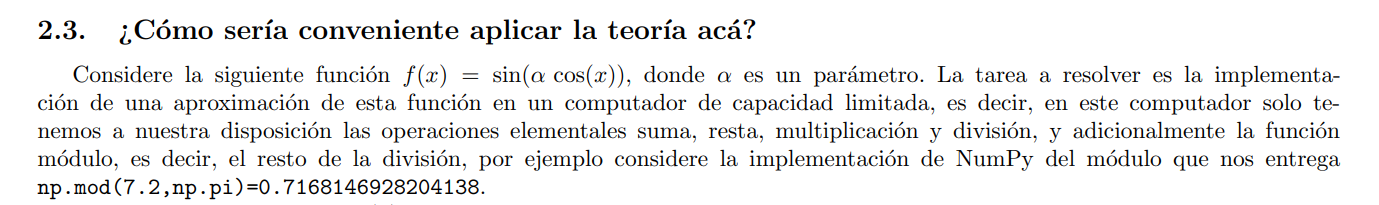

In [8]:
#algoritmo 1

def polynomialInterpolation_f(alpha,n):
    x_che = chebyshev_points(n)
    f = lambda x,alpha: np.sin(alpha*np.cos(x))
    y_che = f(x_che)
    baricentric_interpolator = BarycentricInterpolator(x_che,y_che)
    return baricentric_interpolator


In [11]:
#algoritmo 2

def compositeConstructionSinCos(n):
    f_sin = lambda x: np.sin(x)
    f_cos = lambda x: np.cos(x)
    x_che = chebyshev_points(n)
    y_sin = f_sin(x_che)
    y_cos = f_cos(x_che)
    p_sin = BarycentricInterpolator(x_che,y_sin)
    p_cos = BarycentricInterpolator(x_che,y_cos)
    return p_sin, p_cos

def compositeEvaluationSinCos(f_cos,f_sin,alpha,x):
    return f_sin(alpha*f_cos(x))